In [42]:
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns
from rich.jupyter import display

# **1. Data Preparation**
---
## **1.1 Load Data**
---

In [43]:
# Import dataset from csv file
data = pd.read_csv('D:/Code Skripsi - RL and Ensemble/data/processed/no outliers.csv')

# Table check
data.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,41947875.0,55930500.0,13982625.0,27965250.0,25168725.0
AMT_CREDIT,84226672.13,267949042.9,27965250.0,64772179.88,106267950.0
AMT_ANNUITY,5116708.575,7394944.275,1398262.5,6149558.475,4529438.325
AMT_GOODS_PRICE,72709650.0,233975925.0,27965250.0,61523550.0,106267950.0


In [44]:
data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_EMPLOYED                 0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
NUM_BUREAU_LOANS              0
SUM_CREDIT                    0
AVG_CREDIT                    0
ACTIVE_LOANS                  0
OVERDUE_MONTHS                0
NUM_PREV

In [45]:
# Check the data shape
data.shape

(307511, 49)

In [46]:
# Define response variable
response_variable = 'TARGET'

# Check the proportion of response variable
data[response_variable].value_counts(normalize = True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [47]:
# Drop kolom SK_ID_CURR jika ada
if 'SK_ID_CURR' in data.columns:
    (data.drop(columns='SK_ID_CURR', inplace=True))

# **1.2 Data Exploration**
---
## **1.2.1 Exploratory Data Analysis (EDA)**,

In [48]:
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'NUM_BUREAU_LOANS', 'SUM_CREDIT', 'AVG_CREDIT', 'ACTIVE_LOANS',
       'OVERDUE_MONTHS', 'NUM_PREV_LOANS', 'SUM_PREV_CREDIT',
       'AVG_PREV_CREDIT', 'AMT_PAYMENT', 'CREDIT_INCOME_RATIO',
       'ANNUITY_INCOME_RATIO', 'CREDIT_ANNUITY_RATIO', 'CREDIT_GOODS_RATIO',
       'ANNUITY_GOODS_RATIO', 'PAYMENT_CREDIT_RATIO', 'YEARS_BIRTH',
       'EMPLOYMENT_TO_AGE_RATIO', 'CREDIT_TO_EMPLOYMENT_RATIO',
       'CREDIT_TO_AGE_RATIO', 'INCOME_PER_FAMILY_MEMBER',
       'CHILD_DEPENDENT_R

In [49]:
# Categorical features (tipe objek atau kategori)
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical features (tipe numerik: int, float)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Cetak hasilnya
print("Fitur Kategorikal:")
print(categorical_features)
print("\nFitur Numerikal:")
print(numerical_features)

Fitur Kategorikal:
['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

Fitur Numerikal:
['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'NUM_BUREAU_LOANS', 'SUM_CREDIT', 'AVG_CREDIT', 'ACTIVE_LOANS', 'OVERDUE_MONTHS', 'NUM_PREV_LOANS', 'SUM_PREV_CREDIT', 'AVG_PREV_CREDIT', 'AMT_PAYMENT', 'CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'CREDIT_ANNUITY_RATIO', 'CREDIT_GOODS_RATIO', 'ANNUITY_GOODS_RATIO', 'PAYMENT_CREDIT_RATIO', 'YEARS_BIRTH', 'EMPLOYMENT_TO_AGE_RATIO', 'CREDIT_TO_EMPLOYMENT_RATIO', 'CREDIT_TO_AGE_RATIO', 'INCOME_PER_FAMILY_MEMBER', 'CHILD_DEPENDENT_RATIO', 'HAS_CHILDREN', 'LOAN_TENURE']


In [50]:
cat_columns = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

num_columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'NUM_BUREAU_LOANS', 'SUM_CREDIT', 'AVG_CREDIT', 'ACTIVE_LOANS', 'OVERDUE_MONTHS', 'NUM_PREV_LOANS', 'SUM_PREV_CREDIT', 'AVG_PREV_CREDIT', 'AMT_PAYMENT', 'CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'CREDIT_ANNUITY_RATIO', 'CREDIT_GOODS_RATIO', 'ANNUITY_GOODS_RATIO', 'PAYMENT_CREDIT_RATIO', 'YEARS_BIRTH', 'EMPLOYMENT_TO_AGE_RATIO', 'CREDIT_TO_EMPLOYMENT_RATIO', 'CREDIT_TO_AGE_RATIO', 'INCOME_PER_FAMILY_MEMBER', 'CHILD_DEPENDENT_RATIO', 'HAS_CHILDREN', 'LOAN_TENURE']

## **1.2 Sample Splitting**
---

In [51]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns = [response_variable],
              axis = 1)

# Validate the splixtting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (307511,)
X shape : (307511, 47)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (215257, 47)
y train shape : (215257,)
X test shape  : (92254, 47)
y test shape  : (92254,)


In [53]:
y_train.value_counts(normalize = True)

TARGET
0    0.919273
1    0.080727
Name: proportion, dtype: float64

In [54]:
y_test.value_counts(normalize = True)

TARGET
0    0.919266
1    0.080734
Name: proportion, dtype: float64

In [55]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train),
                       axis = 1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head()

Train data shape: (215257, 48)


,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,PAYMENT_CREDIT_RATIO,YEARS_BIRTH,EMPLOYMENT_TO_AGE_RATIO,CREDIT_TO_EMPLOYMENT_RATIO,CREDIT_TO_AGE_RATIO,INCOME_PER_FAMILY_MEMBER,CHILD_DEPENDENT_RATIO,HAS_CHILDREN,LOAN_TENURE,TARGET
159703,Cash loans,Y,Y,2,83895750.0,3.840561e+08,1.421940e+07,372870000.0,Unaccompanied,Commercial associate,...,0.003943,37.224658,-0.000511,3.894648e+08,9.852181e+06,16779150.00,0.40,1,27.009309,0
79269,Cash loans,N,Y,0,69913125.0,1.053348e+08,7.902047e+06,94149675.0,Family,State servant,...,0.091567,48.063014,-0.000405,1.074237e+08,2.191599e+06,23304375.00,0.00,0,13.330070,0
232615,Cash loans,N,Y,1,23304375.0,2.281685e+07,2.707036e+06,18643500.0,Unaccompanied,Commercial associate,...,0.381692,31.663014,-0.000553,2.322321e+07,7.206152e+05,5826093.75,0.25,1,8.792961,0
33420,Cash loans,N,Y,2,9321750.0,1.582833e+07,1.280808e+06,13982625.0,Unaccompanied,Commercial associate,...,0.122714,43.150685,-0.000545,1.640397e+07,3.668153e+05,2982960.00,0.40,1,12.358079,0
88191,Cash loans,Y,N,0,46608750.0,6.183676e+07,6.587681e+06,55930500.0,Unaccompanied,Commercial associate,...,0.117458,54.553425,-0.000356,6.306114e+07,1.133508e+06,15536250.00,0.00,0,9.386727,0


In [56]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [57]:
# 1. Pisahkan kembali X_train dan y_train dari data_train
X_train = data_train.drop(columns='TARGET')
y_train = data_train['TARGET']

In [58]:
# 2. Gabungkan kembali dengan X_test
X_full = pd.concat([X_train, X_test], axis=0)

In [59]:
# 3. Encoding kategorikal
X_encoded = pd.get_dummies(X_full, columns=cat_columns, drop_first=True)

In [60]:
# 4. Bagi kembali ke train dan test (berdasarkan ukuran asli)
X_train_encoded = X_encoded.iloc[:X_train.shape[0], :].copy()
X_test_encoded = X_encoded.iloc[X_train.shape[0]:, :].copy()

In [61]:
# Ulangi one-hot encoding dan bersihkan nama kolom
X_encoded = pd.get_dummies(X_full, columns=cat_columns, drop_first=True)

# Bersihkan nama kolom dari karakter yang tidak valid untuk LightGBM
X_encoded.columns = X_encoded.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

In [62]:
# Split kembali ke X_train_encoded dan X_test_encoded
X_train_encoded = X_encoded.iloc[:X_train.shape[0], :].copy()
X_test_encoded = X_encoded.iloc[X_train.shape[0]:, :].copy()

In [63]:
from imblearn.under_sampling import RandomUnderSampler

# Buat objek RandomUnderSampler
rus = RandomUnderSampler(
        sampling_strategy="majority",
        random_state=42
      )

# Fit objek
X_train_encoded, y_train = rus.fit_resample(X_train_encoded, y_train)

# Load Model
---

In [64]:
from joblib import load

model_path = "D:/Code Skripsi - RL and Ensemble/rumusan masalah 2/shap/models/lgbm_rus_credit_scoring.joblib"
loaded_model = load(model_path)

# Validasi singkat
print("AUC pada test set (reloaded):",
      roc_auc_score(y_test, loaded_model.predict_proba(X_test_encoded)[:, 1]))

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.6051288057288493, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6051288057288493
[LightGBM] [Warning] bagging_fraction is set=0.9392185766269796, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9392185766269796
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
AUC pada test set (reloaded): 0.7785352941000643


# SHAP
---

In [65]:
import shap
from catboost import Pool
import matplotlib.pyplot as plt   # Anda sudah import, tapi tak ada salahnya kalau diulang

In [66]:
explainer = shap.TreeExplainer(loaded_model)
shap_values = explainer.shap_values(X_test_encoded)   # sama dengan test_pool juga boleh

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


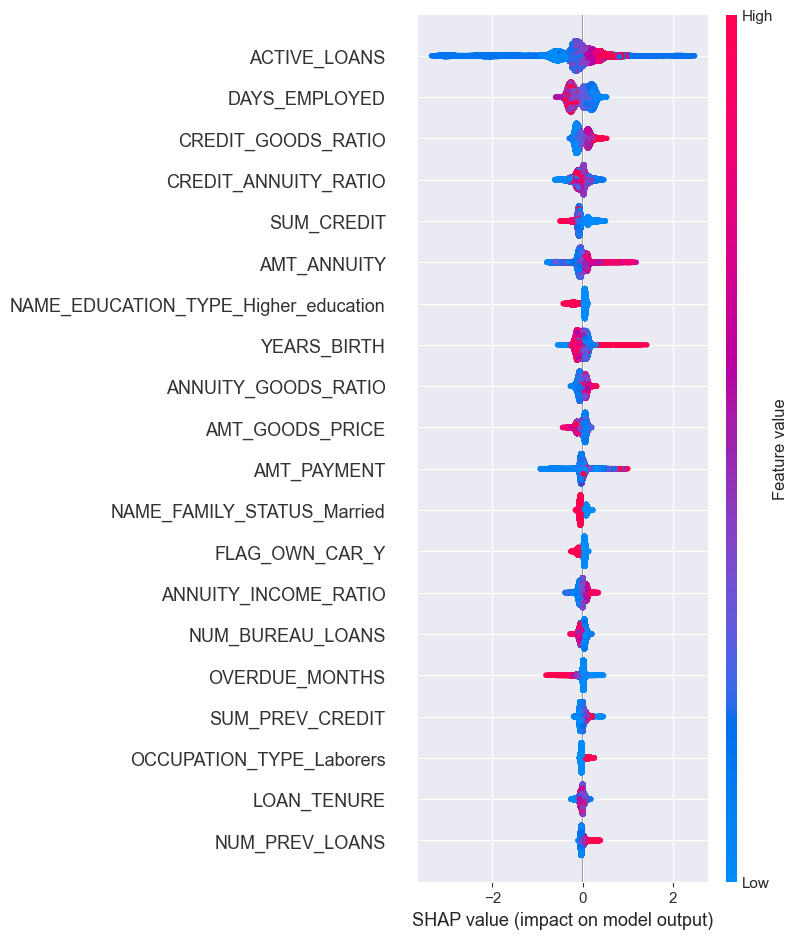

In [67]:
shap.summary_plot(shap_values, X_test_encoded, show=True)

# Analisis Lokal
---

In [68]:
import shap
from IPython.display import display, HTML

# Inisialisasi JavaScript SHAP (sekali saja)
shap.initjs()

In [69]:
lgb_clf = loaded_model

In [70]:
models = {
    "LightGBM": lgb_clf
}

In [71]:
model_names = list(models.keys())

In [72]:
proba_lgb = models["LightGBM"].predict_proba(X_test_encoded)[:, 1]

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.6051288057288493, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6051288057288493
[LightGBM] [Warning] bagging_fraction is set=0.9392185766269796, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9392185766269796
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [73]:
def pick_index(mask, fallback="extreme"):
    """Ambil indeks pertama yang memenuhi mask; kalau kosong pakai fallback."""
    idxs = np.where(mask)[0]
    if len(idxs):
        return int(idxs[0])
    if fallback == "extreme":
        return int(np.argmax(proba_lgb) if mask(True) else np.argmin(proba_lgb))
    raise ValueError("Tidak ada sampel yang memenuhi kriteria dan fallback dimatikan.")

In [95]:
# Kasus 1 – “pasti gagal bayar”
case1_idx = 22

In [96]:
# Kasus 2 – “pasti lancar”
case2_idx = 2

In [97]:
# Kasus 3 – “borderline”
case3_idx = int(np.argmin(np.abs(proba_lgb - 0.5)))

In [98]:
case_indices = [case1_idx, case2_idx, case3_idx]
case_labels  = ["High-Risk (>0.8)", "Low-Risk (<0.2)", "Borderline (~0.5)"]

In [99]:
print("Dipilih indeks studi kasus:", dict(zip(case_labels, case_indices)))

Dipilih indeks studi kasus: {'High-Risk (>0.8)': 22, 'Low-Risk (<0.2)': 2, 'Borderline (~0.5)': 7680}


In [100]:
def make_waterfall_plot(model_name, model, idx, save_html=False):
    """Generate SHAP waterfall plot untuk satu model & satu nasabah."""
    explainer = shap.TreeExplainer(model)
    shap_val = explainer.shap_values(X_test_encoded.iloc[[idx]])  # keep 2-D
    base_val = explainer.expected_value

    # Bentuk Explanation object untuk waterfall plot
    shap_explanation = shap.Explanation(
        values=shap_val,
        base_values=base_val,
        data=X_test_encoded.iloc[[idx]].values,
        feature_names=X_test_encoded.columns.tolist()
    )

    # Buat plot
    shap.plots.waterfall(shap_explanation[0], show=False)

    if save_html:
        import matplotlib.pyplot as plt
        fname = f"shap_waterfall_{model_name.lower()}_idx{idx}.png"
        plt.savefig(fname, bbox_inches="tight")
        plt.close()
        print(f"Waterfall plot {model_name} (idx {idx}) tersimpan: {fname}")

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


Waterfall plot LightGBM (idx 22) tersimpan: shap_waterfall_lightgbm_idx22.png



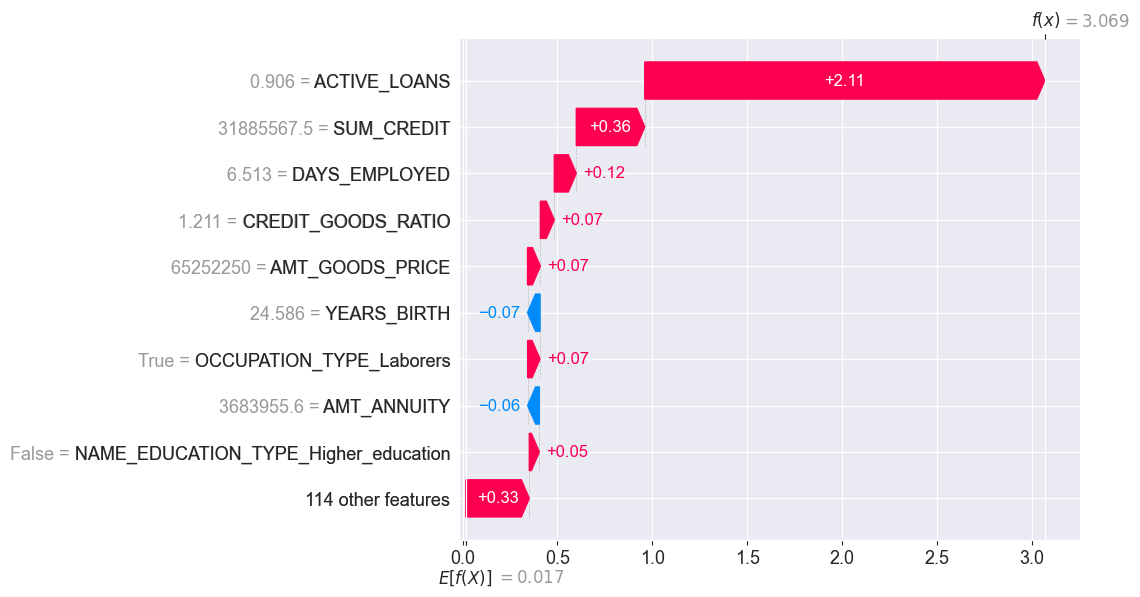

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


Waterfall plot LightGBM (idx 2) tersimpan: shap_waterfall_lightgbm_idx2.png



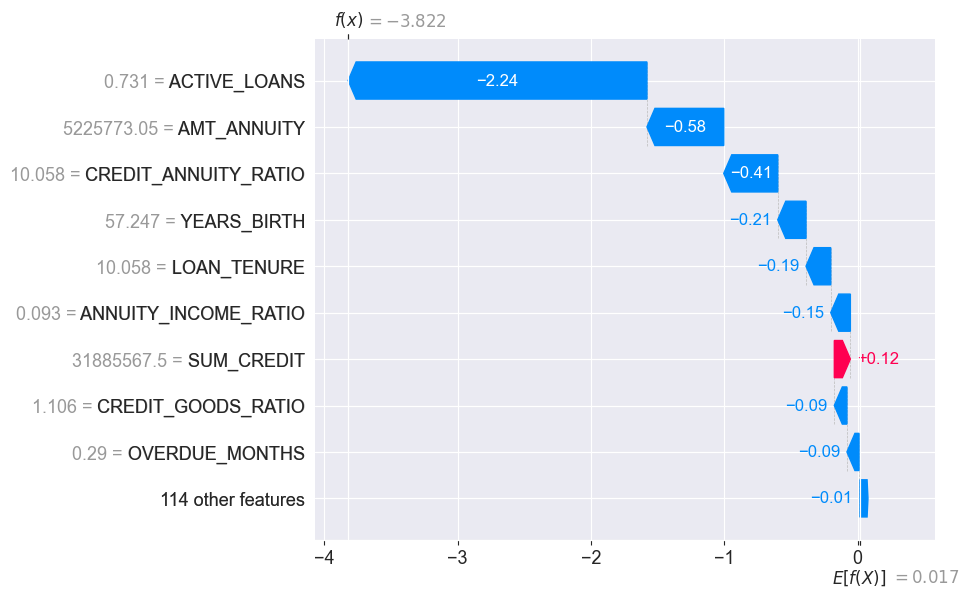

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


Waterfall plot LightGBM (idx 7680) tersimpan: shap_waterfall_lightgbm_idx7680.png



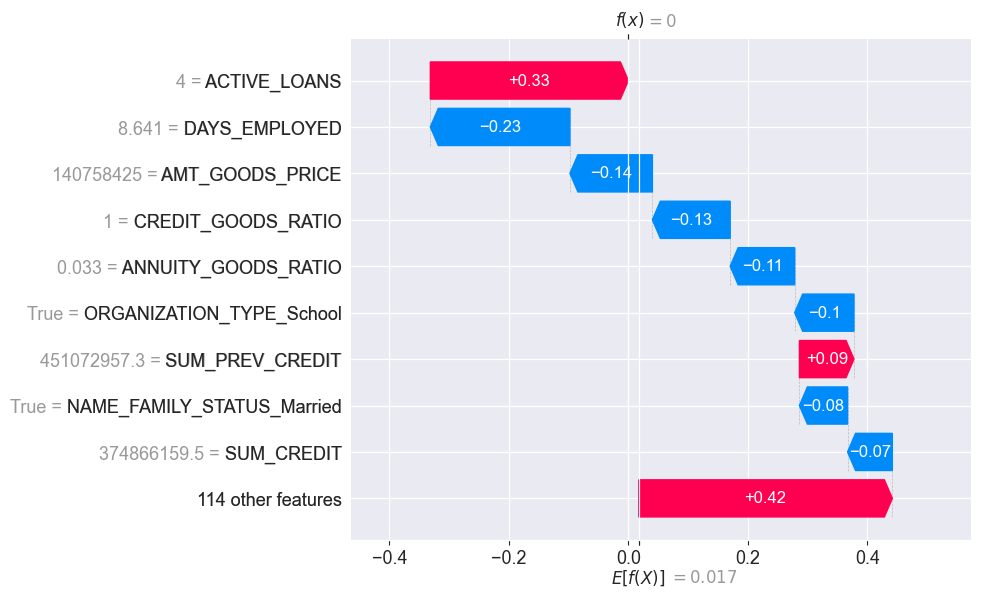

In [101]:
import base64
from IPython.display import display, HTML

for label, idx in zip(case_labels, case_indices):
    display(HTML(f"<h3>{label} – Index {idx}</h3>"))
    html_row = ""

    for mname, mobj in models.items():
        fname = f"shap_waterfall_{mname.lower()}_idx{idx}.png"
        make_waterfall_plot(mname, mobj, idx, save_html=True)  # hanya save

        # Baca file gambar & encode ke base64
        with open(fname, "rb") as f:
            img_base64 = base64.b64encode(f.read()).decode('utf-8')
        html_row += f"<div><strong>{mname}</strong><br><img src='data:image/png;base64,{img_base64}' width='100%'></div>"

    # Tampilkan dalam grid
    display(HTML(
        f"""
        <div style='display:grid;grid-template-columns: repeat({len(models)}, 1fr);gap:15px;align-items: start;'>
            {html_row}
        </div>
        <hr style='margin:30px 0'>
        """
    ))